# VERİ MADENCİLİĞİ DERSİ 2020-2021 BAHAR DÖNEMİ PROJESİ

# 1) VERİ SETİNİN TANITILMASI
Üzerinde çalışma yapılan veri seti, Kaggle aracılığıyla bir veri deposu görevi gören UCI(https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) üzerinden elde edilmiştir. 
## Veri setindeki özniteliklerimizi tanıyalım:
### Banka müşteri verileri:
1. age(yaş)
2. job(iş): İş türü
3. marital(medeni hali): Müşterinin medeni durumu 
4. education(eğitim)
5. default(temerrüt): Temerrüde düşen kredi var mı?
6. balance(bakiye): Ortalama yıllık bakiye(Euro)
7. housing(konut): Konut kredisi var mı?
8. loan(kredi): Kişisel kredisi var mı?
### Mevcut kampanyanın son kişisiyle ilgili:
9. contact(iletişim): İletişim yöntemi
10. day(gün): Ayın son iletişime geçilen günü
11. month(ay): Yılın en son iletişime geçilen ayı
12. duration(süre): Son görüşme süresi(saniye)
13. campaign(kampanya): Bu kampanya sırasında, bu müşteri için gerçekleştirilen iletişim sayısı
14. pdays(günler): Önceki bir kampanyadan müşteriyle iletişim kurulduktan sonra geçen gün sayısı 
15. previous(önceki): Bu kampanyadan önce bu müşteriyle iletişime geçme sayısı
16. poutcome(sonuç): Önceki pazarlama kampanyasının sonucu
### Çıktı değişkeni (İstenen hedef):
17. y : Müşteri vadeli mevduata abone oldu mu?

# 2) VERİ ÖN İŞLEME
## 2.1)Verilerin Bağımlı ve Bağımsız Değişkenler Olarak Ayrılması
Verilerimizi bağımlı ve bağımsız değişkenler olarak nitelendirmemizin sebebi belirlediğimiz bağımsız değişkenler üzerinden yola çıkarak bağımlı değişkenin tahmin edilebilmesini sağlamaktır.

### Bağımsız Değişkenler
- age
- job
- marital
- education
- default
- balance
- housing
- loan
- contact
- day
- month
- duration
- campaign
- pdays
- previous
- poutcome
### Bağımlı Değişkenler
- y

## 2.2) Dengesiz Veri Kümesinin İşlenmesi

Verilerin bağımlı ve bağımsız olarak belirlenmesinden sonrasında ise verilerimiz dengesiz olduğu için "Undersampling for Imbalanced Classification" metodunu kullanarak verimizde ilk başta %88 olan tahmin oranını %50'ye düşürdük ve elimizde 10578 adet veri kalmasını sağlamış olduk. *Özniteliklerimize ise bu aşamada dokunmadık.*

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import heatmap
from sklearn import preprocessing
from collections import Counter

from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
 # Abone olup olmadıklarını rahat okuyabilmek bazı için değişimler yaptık
df["y"]=df["y"].replace("no","Abone Olmadı")
df["y"]=df["y"].replace("yes","Abone Oldu")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,Abone Olmadı
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,Abone Olmadı
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,Abone Olmadı
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,Abone Olmadı
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,Abone Olmadı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,Abone Oldu
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,Abone Oldu
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,Abone Oldu
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,Abone Olmadı


Abone Olmadı    39922
Abone Oldu       5289
Name: y, dtype: int64

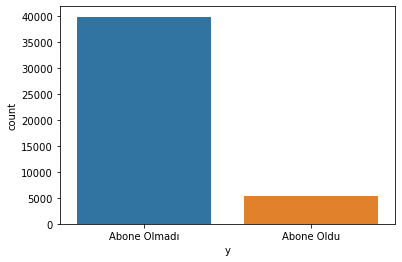

In [7]:
sns.countplot(x="y", data=df)
df.loc[:,"y"].value_counts()    

Şu an elimizde olan bilgiler ışığında kapıdan girecek yeni bir müşterinin abone olup olmayacağını %88(abone olmayacak) oranla doğru tahmin edebiliriz.

## Verideki dengesizliği gidermek için bazı işlemler yaptık
Giriş bölümünde bahsetmiş olduğumuz erilerdeki dengesizliğin giderilmesi işlemine buradan itibaren başlıyoruz. Bu işlemi yaparken kullandığımız metod ise Dengesiz Sınıflandırma için Alt Örnekleme metodudur. Kısaca bu metodu açıklayacak olursak; bu teknik çoğunluk sınıfına ait örneklerin rastgele seçilerek çıkarılmasıyla veri setini dengeleme tekniğidir diyebiliriz.  
## Undersampling for Imbalanced Classification (Dengesiz Sınıflandırma için Alt Örnekleme) 

In [8]:
loan_app = df[df["y"]=="Abone Oldu"]
loan_ntapp = df[df["y"]=="Abone Olmadı"]

In [9]:
 # Abone olan ve olmayan verilerin ayrılmış hali.
print(loan_app.shape,loan_ntapp.shape,df.shape) 

(5289, 17) (39922, 17) (45211, 17)


In [10]:
X=df
Y=df["y"] 

In [11]:
X.drop("y",axis=1, inplace=True)

In [12]:
from imblearn import under_sampling

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

# Verimizdeki dengesizliği giderme işlemini, tahmin olasılığımızı %88'den %50'ye düşürerek burada tamamlamış olduk.


[('Abone Oldu', 5289), ('Abone Olmadı', 5289)] (10578,)


In [14]:
X_resampled["y"]= y_resampled
X_resampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,Abone Oldu
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,Abone Oldu
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,Abone Oldu
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Abone Oldu
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Abone Oldu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,47,technician,married,secondary,no,-401,yes,no,unknown,23,may,78,1,-1,0,unknown,Abone Olmadı
10574,52,technician,divorced,secondary,no,0,no,no,telephone,17,nov,215,3,-1,0,unknown,Abone Olmadı
10575,39,blue-collar,married,primary,no,1433,yes,no,cellular,8,may,182,2,366,1,other,Abone Olmadı
10576,57,management,married,secondary,no,-868,yes,yes,cellular,23,jul,186,1,-1,0,unknown,Abone Olmadı


<AxesSubplot:xlabel='y', ylabel='count'>

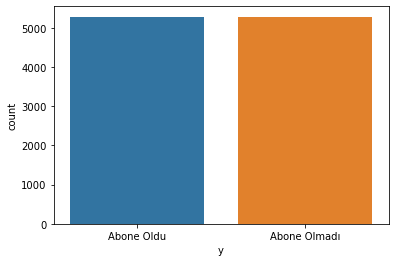

In [15]:
# Tahmin olasılığımızın %50 oranına düştüğünü grafik ile gösterdik.
sns.countplot(x="y", data=X_resampled)  

# Yeni verimizdeki bilgilerin gösterilmesi

In [16]:
X_resampled.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  month      10578 non-null  object
 11  duration   10578 non-null  int64 
 12  campaign   10578 non-null  int64 
 13  pdays      10578 non-null  int64 
 14  previous   10578 non-null  int64 
 15  poutcome   10578 non-null  object
 16  y          10578 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [17]:
X_resampled.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.316884,1530.914067,15.539894,379.122802,2.508130,52.548780,0.854509
std,11.989555,3218.291508,8.389991,349.839787,2.731116,108.804806,2.287155
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,117.000000,8.000000,144.000000,1.000000,-1.000000,0.000000
50%,39.000000,547.000000,15.000000,260.000000,2.000000,-1.000000,0.000000
75%,49.000000,1718.000000,21.000000,506.000000,3.000000,66.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,44.000000,854.000000,58.000000


In [18]:
X_resampled.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
#Her özniteliğin sahip olduğu unique değerleri gösterdik
{column:len(X_resampled[column].unique()) for column in X_resampled.select_dtypes("object").columns}


{'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'month': 12,
 'poutcome': 4,
 'y': 2}

In [20]:
X_resampled_Filtered = X_resampled.dropna(axis = 0, how = 'any')
X_resampled_Filtered.dtypes
for col in X_resampled_Filtered.iloc[:,[1, 2, 3, 4, 6, 7, 8, 10, 15, 16]]:
    X_resampled_Filtered[col] = X_resampled_Filtered[col].astype('category')
X_resampled_Filtered.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [21]:
# Veriler arasından veri tipi object olanları category tipine çevirerek bu verilerdeki unique veri sayılarını gösterdik
{column:len(X_resampled[column].unique()) 
for column in X_resampled_Filtered.select_dtypes("category").columns}

{'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'month': 12,
 'poutcome': 4,
 'y': 2}

C:\Users\borat\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\borat\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\borat\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\borat\Anaconda\lib\site-p

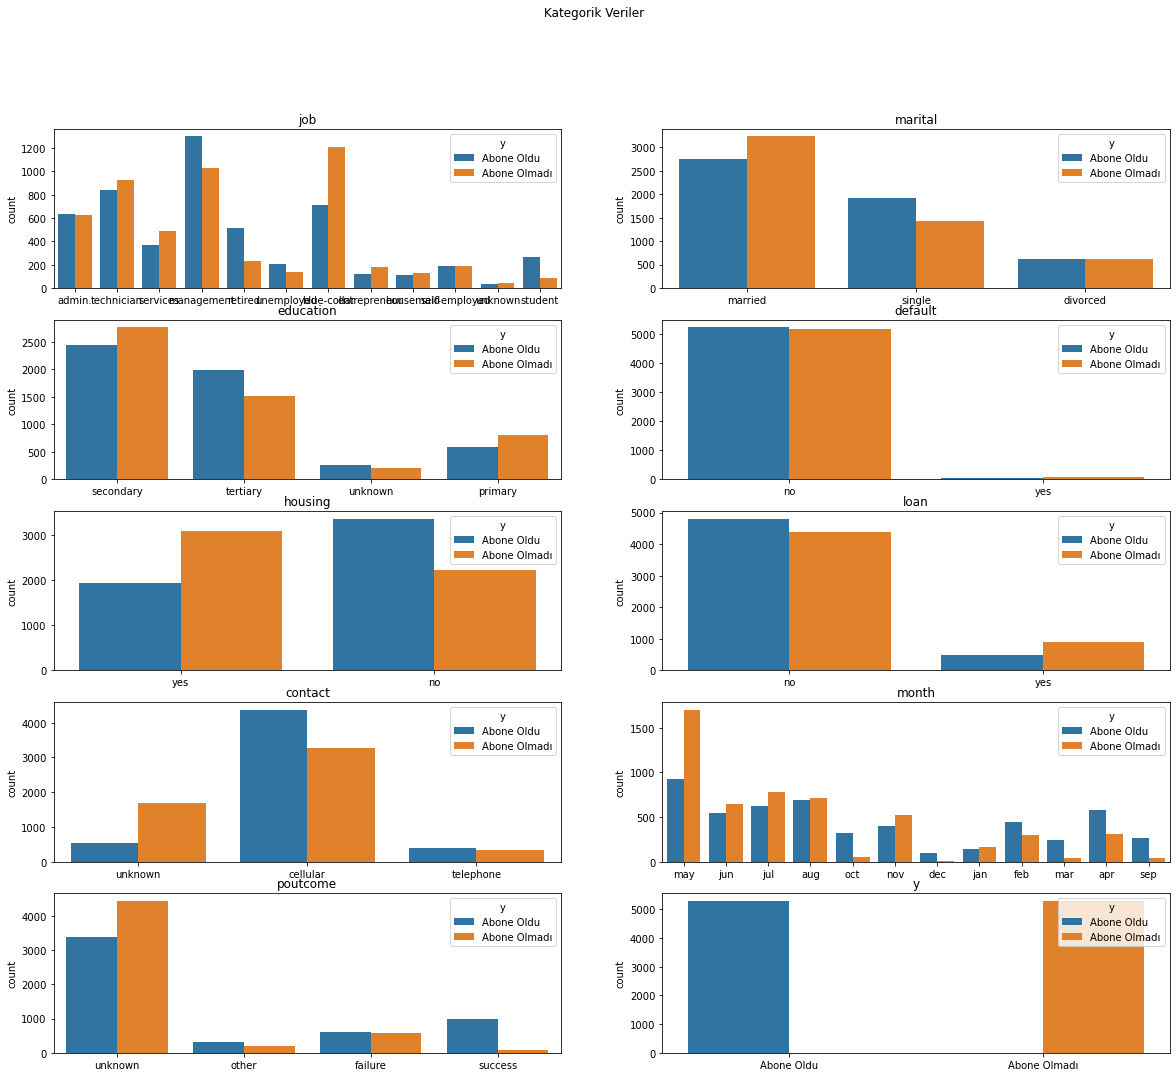

In [22]:
# Kategorik verilerin tablolar halinde gösterilmesi
plt.figure(figsize=(20,17))

for i,column in enumerate(X_resampled_Filtered.select_dtypes("category").columns):
    plt.subplot(5,2,i+1)
    sns.countplot(X_resampled[column], hue=X_resampled["y"])
    plt.title(column)
    plt.suptitle("Kategorik Veriler")
    plt.xlabel(' ')

#### Şu ana kadar yaptığımız işlemler sonucunda herhangi bir eksik verimiz olmadığını görmekteyiz. Şimdi ise elimizdeki verilerin içerisindeki aykırı verileri gösterme ve bunları düzenleme işlemlerine geçiyoruz.

<AxesSubplot:xlabel='pdays', ylabel='y'>

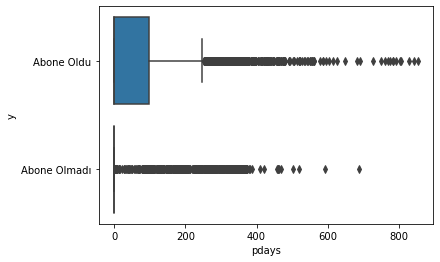

In [23]:
sns.boxplot(x=X_resampled["pdays"],y=X_resampled["y"])

<AxesSubplot:xlabel='previous', ylabel='y'>

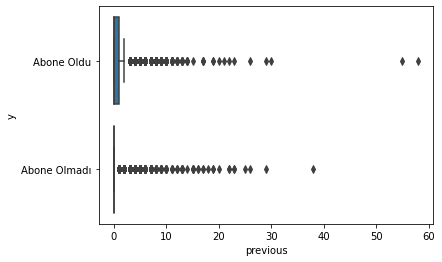

In [24]:
sns.boxplot(x=X_resampled["previous"],y=X_resampled["y"])

<AxesSubplot:xlabel='day', ylabel='y'>

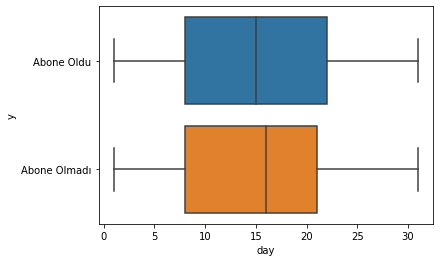

In [25]:
sns.boxplot(x=X_resampled["day"],y=X_resampled["y"])

<AxesSubplot:xlabel='duration', ylabel='y'>

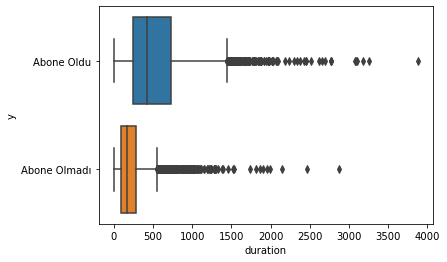

In [26]:
sns.boxplot(x=X_resampled["duration"],y=X_resampled["y"])

<AxesSubplot:xlabel='age', ylabel='y'>

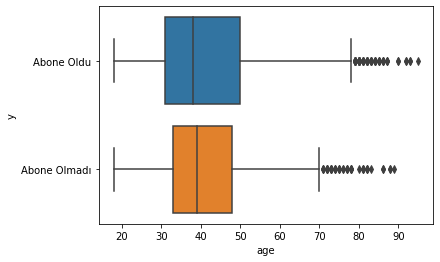

In [27]:
sns.boxplot(x=X_resampled["age"],y=X_resampled["y"])

<AxesSubplot:xlabel='balance', ylabel='y'>

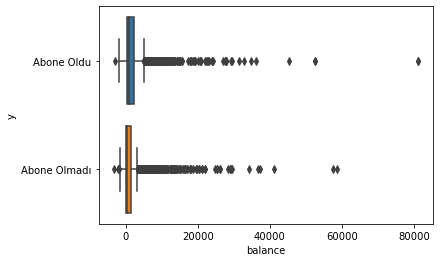

In [28]:
sns.boxplot(x=X_resampled["balance"],y=X_resampled["y"])

<AxesSubplot:xlabel='campaign', ylabel='y'>

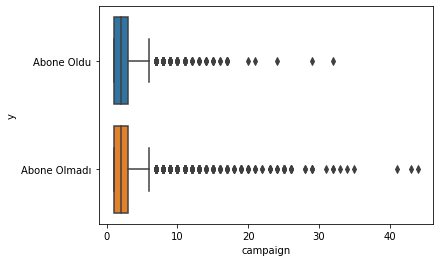

In [29]:
sns.boxplot(x=X_resampled["campaign"],y=X_resampled["y"])

In [30]:
# Verileri LabelEncoder ile sayısal hale getiriyoruz.
from sklearn.preprocessing import LabelEncoder
yenilenmis = X_resampled.apply(lambda x : LabelEncoder().fit_transform(x) if x.dtype =="object" else x)
yenilenmis

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,0
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,0
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,0
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,0
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,47,9,1,1,0,-401,1,0,2,23,8,78,1,-1,0,3,1
10574,52,9,0,1,0,0,0,0,1,17,9,215,3,-1,0,3,1
10575,39,1,1,0,0,1433,1,0,0,8,8,182,2,366,1,1,1
10576,57,4,1,1,0,-868,1,1,0,23,5,186,1,-1,0,3,1


In [31]:
Q1 = X_resampled.quantile(0.25)
Q3 = X_resampled.quantile(0.75)
IQR = Q3-Q1
IQR

age           17.0
balance     1601.0
day           13.0
duration     362.0
campaign       2.0
pdays         67.0
previous       1.0
dtype: float64

In [32]:
Q1_pdays = X_resampled.pdays.quantile(0.25)
Q3_pdays = X_resampled.pdays.quantile(0.75)
IQR_pdays = Q3_pdays-Q1_pdays
IQR_pdays

67.0

In [33]:
pdays_ust_sinir = Q3_pdays + 1.5*IQR_pdays
pdays_ust_sinir

166.5

In [34]:
yenilenmis_pdays_atilacak = yenilenmis[(yenilenmis["pdays"]> (Q3_pdays+ 1.5*IQR_pdays))&yenilenmis["y"]]
yenilenmis_pdays_atilacak.shape

(616, 17)

In [35]:
# 1- Toplam 616 satır ayrkırı verimiz bulunuyor ve bunları şimdi atacağız.
yenilenmis.drop( yenilenmis[(yenilenmis["pdays"] > (Q3_pdays+ 1.5*IQR_pdays))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9962, 17)

In [36]:
Q1_previous = X_resampled.previous.quantile(0.25)
Q3_previous = X_resampled.previous.quantile(0.75)
IQR_previous = Q3_previous-Q1_previous
IQR_previous

1.0

In [37]:
previous_ust_sinir = Q3_previous + 1.5*IQR_previous
previous_ust_sinir

2.5

In [38]:
yenilenmis_pdays_atilacak = yenilenmis[(yenilenmis["previous"]> (Q3_previous+ 1.5*IQR_previous))&yenilenmis["y"]]
yenilenmis_pdays_atilacak.shape

(101, 17)

In [39]:
# 2- Toplam 101 adet aykırı previous verisini atıyoruz.
yenilenmis.drop( yenilenmis[(yenilenmis["previous"] > (Q3_previous+ 1.5*IQR_previous))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9861, 17)

In [40]:
Q1_day = X_resampled.day.quantile(0.25)
Q3_day = X_resampled.day.quantile(0.75)
IQR_day = Q3_day-Q1_day
IQR_day

13.0

In [41]:
day_ust_sinir = Q3_day + 1.5*IQR_day
day_ust_sinir

40.5

In [42]:
previous_day_atilacak = yenilenmis[(yenilenmis["day"]> (Q3_day+ 1.5*IQR_day))&yenilenmis["y"]]
previous_day_atilacak.shape

(0, 17)

### day özniteliğinin grafiğinde de gördüğümüz gibi veriler içerisinde herhangi bir aykırı veri yoktur

In [43]:
Q1_duration = X_resampled.duration.quantile(0.25)
Q3_duration = X_resampled.duration.quantile(0.75)
IQR_duration = Q3_duration-Q1_duration
IQR_duration

362.0

In [44]:
duration_ust_sinir = Q3_duration + 1.5*IQR_duration
duration_ust_sinir

1049.0

In [45]:
yenilenmis_duration_atilacak = yenilenmis[(yenilenmis["duration"]> (Q3_duration+ 1.5*IQR_duration))&yenilenmis["y"]]
yenilenmis_duration_atilacak.shape

(38, 17)

In [46]:
yenilenmis.drop( yenilenmis[(yenilenmis["duration"] > (Q3_duration+ 1.5*IQR_duration))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9823, 17)

In [47]:
Q1_age = X_resampled.age.quantile(0.25)
Q3_age = X_resampled.age.quantile(0.75)
IQR_age = Q3_age-Q1_age
IQR_age

17.0

In [48]:
age_ust_sinir = Q3_age + 1.5*IQR_age
age_ust_sinir

74.5

In [49]:
yenilenmis_age_atilacak = yenilenmis[(yenilenmis["age"]> (Q3_age+ 1.5*IQR_age))&yenilenmis["y"]]
yenilenmis_age_atilacak.shape

(20, 17)

In [50]:
yenilenmis.drop( yenilenmis[(yenilenmis["age"]> (Q3_age+ 1.5*IQR_age))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9803, 17)

In [51]:
Q1_balance = X_resampled.balance.quantile(0.25)
Q3_balance = X_resampled.balance.quantile(0.75)
IQR_balance = Q3_balance-Q1_balance
IQR_balance

1601.0

In [52]:
balance_ust_sinir = Q3_balance + 1.5*IQR_balance
balance_ust_sinir

4119.5

In [53]:
balance_alt_sinir = Q1_balance - 1.5*IQR_balance
balance_alt_sinir

-2284.5

In [54]:
yenilenmis_balance_atilacak_ust = yenilenmis[(yenilenmis["balance"]> (Q3_balance+ 1.5*IQR_balance))&yenilenmis["y"]]
yenilenmis_balance_atilacak_ust.shape

(348, 17)

In [55]:
yenilenmis_balance_atilacak_alt = yenilenmis[(yenilenmis["balance"] < (Q1_balance - 1.5*IQR_balance))&yenilenmis["y"]]
yenilenmis_balance_atilacak_alt.shape

(1, 17)

In [56]:
yenilenmis.drop( yenilenmis[(yenilenmis["balance"]> (Q3_balance+ 1.5*IQR_balance))&yenilenmis["y"]].index,inplace=True)
yenilenmis.drop( yenilenmis[(yenilenmis["balance"] < (Q1_balance - 1.5*IQR_balance))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9454, 17)

In [57]:
Q1_campaign = X_resampled.campaign.quantile(0.25)
Q3_campaign = X_resampled.campaign.quantile(0.75)
IQR_campaign = Q3_campaign-Q1_campaign
IQR_campaign

2.0

In [58]:
yenilenmis_campaign_atilacak = yenilenmis[(yenilenmis["campaign"]> (Q3_campaign+ 1.5*IQR_campaign))&yenilenmis["y"]]
yenilenmis_campaign_atilacak.shape

(335, 17)

In [59]:
yenilenmis.drop( yenilenmis[(yenilenmis["campaign"] > (Q3_campaign + 1.5*IQR_campaign))&yenilenmis["y"]].index,inplace=True)
yenilenmis.shape

(9119, 17)

In [60]:
yenilenmis.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000
mean,41.277333,4.541836,1.203092,1.291808,0.014146,1326.213949,0.447746,0.126988,0.496655,15.456739,5.454874,402.575611,2.169426,40.665972,0.697774,2.591183,0.420002
std,12.126678,3.248463,0.631993,0.743953,0.118100,2792.797671,0.497289,0.332977,0.825247,8.398084,3.204467,355.669307,1.707474,97.031561,2.029695,0.875812,0.493586
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,111.000000,0.000000,0.000000,0.000000,8.000000,3.000000,158.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,532.000000,0.000000,0.000000,0.000000,15.000000,6.000000,280.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1592.500000,1.000000,0.000000,1.000000,21.000000,8.000000,543.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,32.000000,854.000000,58.000000,3.000000,1.000000


# Korelasyon Analizi
## Özniteliklerimiz ile hedef değişkenimiz arasındaki ilişkiye bakıp aralarındaki ilişki 10'dan düşük olan özniteliklerimizi verisetinden atacağız.
- 0.01 – 0.29 düşük düzeyde ilişki

- •0.30 – 0.70 orta düzeyde ilişki

- •0.71 – 0.99 yüksek düzeyde ilişki
- Burada kullanmış olduğumuz 10 sayısını kendimiz belirledik. Hedef değişken ile korelasyona girecek öznitelik arasındaki ilişkinin çok zayıf olmasınıı istemedik

In [61]:
x = yenilenmis.drop("y",axis=1)
y = yenilenmis["y"]

In [62]:
yenilenmis.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [63]:
x=yenilenmis['age']
y=yenilenmis['y']
print("------Age ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['job']
y=yenilenmis['y']
print("-----Job ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['marital']
y=yenilenmis['y']
print("---->marital ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['education']
y=yenilenmis['y']
print("education ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['default']
y=yenilenmis['y']
print("-----default ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['balance']
y=yenilenmis['y']
print("balance ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['housing']
y=yenilenmis['y']
print("housing ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['loan']
y=yenilenmis['y']
print("loan ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['contact']
y=yenilenmis['y']
print("contact ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['day']
y=yenilenmis['y']
print("------day ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['month']
y=yenilenmis['y']
print("------month ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['pdays']
y=yenilenmis['y']
print("pdays ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))


x=yenilenmis['previous']
y=yenilenmis['y']
print("previous ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['poutcome']
y=yenilenmis['y']
print("poutcome ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))


x=yenilenmis['duration']
y=yenilenmis['y']
print("duration ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))

x=yenilenmis['campaign']
y=yenilenmis['y']
print("------campaign ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(x.corr(y)*100))


------Age ile hedef sütunumuz arasındaki korelasyon -3.806020056515443'dır.
-----Job ile hedef sütunumuz arasındaki korelasyon -5.842987998187272'dır.
---->marital ile hedef sütunumuz arasındaki korelasyon -7.588661067925069'dır.
education ile hedef sütunumuz arasındaki korelasyon -10.920166441189897'dır.
-----default ile hedef sütunumuz arasındaki korelasyon 4.293353020835273'dır.
balance ile hedef sütunumuz arasındaki korelasyon -20.116325855439662'dır.
housing ile hedef sütunumuz arasındaki korelasyon 19.35297821939777'dır.
loan ile hedef sütunumuz arasındaki korelasyon 12.521100445541888'dır.
contact ile hedef sütunumuz arasındaki korelasyon 31.685482248961772'dır.
------day ile hedef sütunumuz arasındaki korelasyon 4.176904083320665'dır.
------month ile hedef sütunumuz arasındaki korelasyon 4.915010709694177'dır.
pdays ile hedef sütunumuz arasındaki korelasyon -33.9570283807935'dır.
previous ile hedef sütunumuz arasındaki korelasyon -27.362485430667704'dır.
poutcome ile hedef sütu

In [64]:
yenilenmis.drop("age", axis=1, inplace=True)
yenilenmis.drop("job", axis=1, inplace=True)
yenilenmis.drop("marital", axis=1, inplace=True)
yenilenmis.drop("default", axis=1, inplace=True)
yenilenmis.drop("day", axis=1, inplace=True)
yenilenmis.drop("month", axis=1, inplace=True)
yenilenmis.drop("campaign", axis=1, inplace=True)
yenilenmis

,education,balance,housing,loan,contact,duration,pdays,previous,poutcome,y
0,1,2343,1,0,2,1042,-1,0,3,0
1,1,45,0,0,2,1467,-1,0,3,0
2,1,1270,1,0,2,1389,-1,0,3,0
3,1,2476,1,0,2,579,-1,0,3,0
4,2,184,0,0,2,673,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
10572,1,0,1,0,1,40,-1,0,3,1
10573,1,-401,1,0,2,78,-1,0,3,1
10574,1,0,0,0,1,215,-1,0,3,1
10576,1,-868,1,1,0,186,-1,0,3,1


In [65]:
yenilenmis.head()

,education,balance,housing,loan,contact,duration,pdays,previous,poutcome,y
0,1,2343,1,0,2,1042,-1,0,3,0
1,1,45,0,0,2,1467,-1,0,3,0
2,1,1270,1,0,2,1389,-1,0,3,0
3,1,2476,1,0,2,579,-1,0,3,0
4,2,184,0,0,2,673,-1,0,3,0


In [66]:
corr = yenilenmis.corr()
corr

,education,balance,housing,loan,contact,duration,pdays,previous,poutcome,y
education,1.000000,0.070131,-0.110709,-0.069914,-0.125510,-0.027016,0.055513,0.043595,-0.071224,-0.109202
balance,0.070131,1.000000,-0.100284,-0.095355,-0.077074,0.060010,0.079079,0.074829,-0.090540,-0.201163
housing,-0.110709,-0.100284,1.000000,0.093727,0.258734,0.069440,-0.027530,-0.051288,0.055449,0.193530
loan,-0.069914,-0.095355,0.093727,1.000000,0.038265,0.011251,-0.061614,-0.057612,0.062207,0.125211
contact,-0.125510,-0.077074,0.258734,0.038265,1.000000,-0.027870,-0.210444,-0.174051,0.233763,0.316855
duration,-0.027016,0.060010,0.069440,0.011251,-0.027870,1.000000,0.022761,0.004439,-0.011763,-0.445137
pdays,0.055513,0.079079,-0.027530,-0.061614,-0.210444,0.022761,1.000000,0.510265,-0.767770,-0.339570
previous,0.043595,0.074829,-0.051288,-0.057612,-0.174051,0.004439,0.510265,1.000000,-0.559196,-0.273625
poutcome,-0.071224,-0.090540,0.055449,0.062207,0.233763,-0.011763,-0.767770,-0.559196,1.000000,0.325697
y,-0.109202,-0.201163,0.193530,0.125211,0.316855,-0.445137,-0.339570,-0.273625,0.325697,1.000000


# Korelasyonu gösterirken üst üçgeni göstermemize gerek olmadığı için böyle bir maskeleme işlemi yapıyoruz.

In [67]:
mask = np.zeros_like(yenilenmis.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

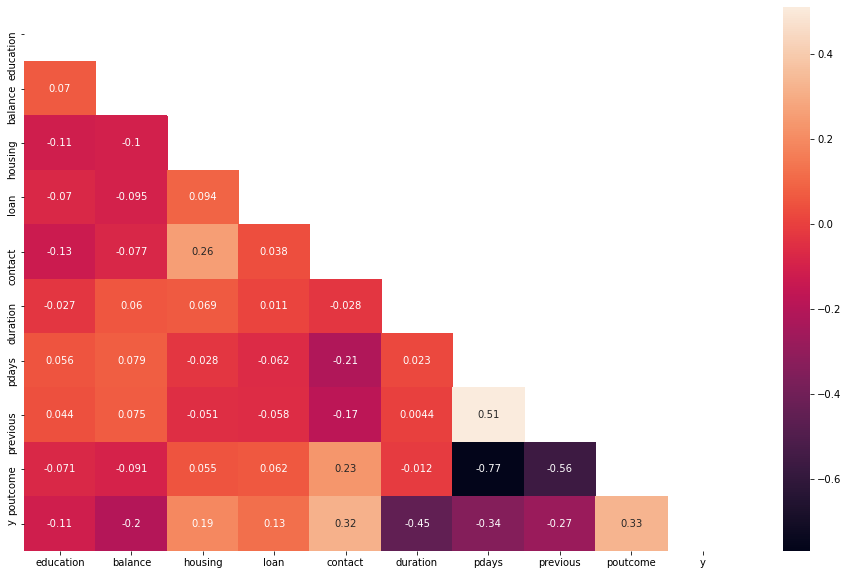

In [68]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, xticklabels=yenilenmis.columns, yticklabels=yenilenmis.columns , annot=True , mask=mask )

# "pdays" ve "poutcome" özniteliklerin korelasyon çıktılarının değeri çok yüksek olduğu için bu sonuç sağlıksız olacağı için bu iki özniteliği çıkartıyoruz.

In [69]:
yenilenmis.drop("pdays", axis=1, inplace=True)
yenilenmis.drop("poutcome", axis=1, inplace=True)
yenilenmis

,education,balance,housing,loan,contact,duration,previous,y
0,1,2343,1,0,2,1042,0,0
1,1,45,0,0,2,1467,0,0
2,1,1270,1,0,2,1389,0,0
3,1,2476,1,0,2,579,0,0
4,2,184,0,0,2,673,0,0
...,...,...,...,...,...,...,...,...
10572,1,0,1,0,1,40,0,1
10573,1,-401,1,0,2,78,0,1
10574,1,0,0,0,1,215,0,1
10576,1,-868,1,1,0,186,0,1


# Veri setimizdeki önişleme adımlarını tamamladık ve verilerimizi testlere sokmak için test ve train diye bölüyoruz.

In [174]:
x = yenilenmis.drop("y",axis=1)
y = yenilenmis["y"]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=1/3, random_state= 42)

In [175]:
from sklearn.preprocessing import  StandardScaler
sts = StandardScaler()
scale = sts.fit(x_train)
scale

StandardScaler()

In [176]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

# Lojistik Regresyon işlemleri

In [177]:
lambda_range = np.arange(0,1,0.01)
for lmb in lambda_range:
    LR = LogisticRegression(penalty = 'l2', C = lmb, multi_class="multinomial",random_state=42)
    LR.fit(x_train, y_train)
    print('lambda:', lmb)
    print('Özelliklerin katsayıları:', LR.coef_)
    print('Training accuracy:', LR.score(x_train, y_train))
    print('')

C:\Users\borat\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
C:\Users\borat\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:300: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
C:\Users\borat\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:352: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
C:\Users\borat\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lambda: 0.0
Özelliklerin katsayıları: [[0. 0. 0. 0. 0. 0. 0.]]
Training accuracy: 0.5769040960684323

lambda: 0.01
Özelliklerin katsayıları: [[-0.05916414 -0.36969495  0.19281147  0.09905472  0.26424176 -0.87362747
  -0.8002958 ]]
Training accuracy: 0.8330317486428689

lambda: 0.02
Özelliklerin katsayıları: [[-0.06049579 -0.41117306  0.20574834  0.10173287  0.27174009 -0.95921227
  -1.005845  ]]
Training accuracy: 0.8348412567856556

lambda: 0.03
Özelliklerin katsayıları: [[-0.06089375 -0.42932699  0.21153878  0.102821    0.2740264  -0.99612568
  -1.12256581]]
Training accuracy: 0.8348412567856556

lambda: 0.04
Özelliklerin katsayıları: [[-0.06106629 -0.43966586  0.21493008  0.10344102  0.27499942 -1.01709701
  -1.20024592]]
Training accuracy: 0.8340187530843889

lambda: 0.05
Özelliklerin katsayıları: [[-0.06114169 -0.44638666  0.21717348  0.10384826  0.27546888 -1.03071491
  -1.25638773]]
Training accuracy: 0.8343477545648955

lambda: 0.06
Özelliklerin katsayıları: [[-0.06118506 -0.45

lambda: 0.52
Özelliklerin katsayıları: [[-0.06117818 -0.47537226  0.22763769  0.10583824  0.27581183 -1.08983069
  -1.57804745]]
Training accuracy: 0.8358282612271756

lambda: 0.53
Özelliklerin katsayıları: [[-0.06117745 -0.47544087  0.22766445  0.10584367  0.27580834 -1.08997227
  -1.57903312]]
Training accuracy: 0.8358282612271756

lambda: 0.54
Özelliklerin katsayıları: [[-0.06117675 -0.475507    0.22769025  0.1058489   0.27580495 -1.09010872
  -1.57998446]]
Training accuracy: 0.8358282612271756

lambda: 0.55
Özelliklerin katsayıları: [[-0.06117606 -0.47557078  0.22771514  0.10585395  0.27580166 -1.09024034
  -1.58090325]]
Training accuracy: 0.8358282612271756

lambda: 0.56
Özelliklerin katsayıları: [[-0.06117539 -0.47563232  0.22773917  0.10585883  0.27579847 -1.09036735
  -1.58179113]]
Training accuracy: 0.8358282612271756

lambda: 0.5700000000000001
Özelliklerin katsayıları: [[-0.06117474 -0.47569175  0.22776239  0.10586355  0.27579536 -1.09049002
  -1.58264963]]
Training accuracy

In [184]:
# Yukarıdaki değerleri test edip en iyi sonucun 1 noktasında aldığımızı öğrenmiş olduk. Bu sebeple C değerimizi 1 olarak aldık
LR = LogisticRegression(penalty = 'l2', C = 1,multi_class="multinomial",random_state=42)
LR.fit(x_train, y_train)

print('Özelliklerin katsayıları:', LR.coef_)
print('Training accuracy:', LR.score(x_train, y_train))
print('')

Özelliklerin katsayıları: [[-0.06119825 -0.47703902  0.22833691  0.10589732  0.2756974  -1.09354671
  -1.60384598]]
Training accuracy: 0.8359927619674289



In [185]:
LR = LogisticRegression(penalty = 'l2', C = 1, multi_class="multinomial")
LR.fit(x_train, y_train)
print('Test accuracy:', LR.score(x_test, y_test))

Test accuracy: 0.8417763157894737


In [186]:
y_pred = LR.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [187]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[1496,  286],
       [ 195, 1063]], dtype=int64)

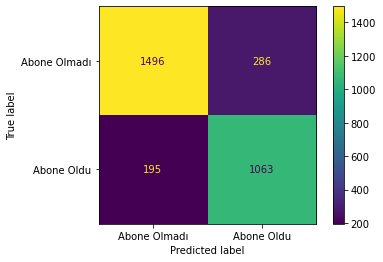

In [188]:
plot_confusion_matrix(LR,x_test,y_test, display_labels=["Abone Olmadı","Abone Oldu"])

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1782
           1       0.79      0.84      0.82      1258

    accuracy                           0.84      3040
   macro avg       0.84      0.84      0.84      3040
weighted avg       0.84      0.84      0.84      3040



# Yapay Sinir Ağları ile Test edilmesi

In [190]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=10000,random_state=42)
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=10000, random_state=42)

In [191]:
mlp.score(x_test,y_test)

0.8483552631578948

In [192]:
pred = mlp.predict(x_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [193]:
confusion_matrix(y_test,pred)

array([[1538,  244],
       [ 217, 1041]], dtype=int64)

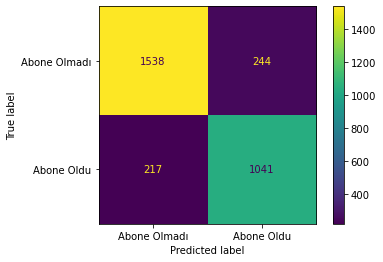

In [194]:
plot_confusion_matrix(mlp,x_test,y_test, display_labels=["Abone Olmadı","Abone Oldu"])

In [195]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1782
           1       0.81      0.83      0.82      1258

    accuracy                           0.85      3040
   macro avg       0.84      0.85      0.84      3040
weighted avg       0.85      0.85      0.85      3040



# Karar Ağaçları ile test edilmesi

In [120]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [121]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [122]:
dt_pred =  dt.predict(x_test)

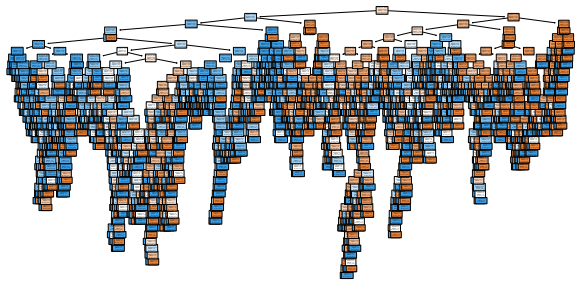

In [132]:
plt.figure(figsize=(10,5))
plot_tree(dt,
         filled=True,
         rounded=True,
          class_names=["Abone Oldu","Abone Olmadı"],
          feature_names=x.columns);

# Karar ağaçlarının doğruluk skoru düşük çıktığı için yukarıdaki grafik ile uğraşmak istemedik fakat buna benzer bir grafik elde ederiz. 

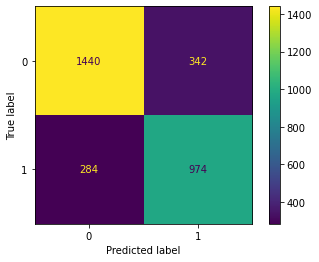

In [140]:
dt_confu = plot_confusion_matrix(dt,x_test,y_test)
dt_confu

In [124]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1782
           1       0.74      0.77      0.76      1258

    accuracy                           0.79      3040
   macro avg       0.79      0.79      0.79      3040
weighted avg       0.80      0.79      0.79      3040



# Sonuç Olarak;

Veri setimizin dengesiz olmasından kaynaklanacak olan sıkıntıların önüne geçmek icin setimizi bir kaç algoritmaya sokarak dengeli hale getirdikten sonra veri önişleme işlemlerini gerçekleştirdik. Sonrasında ise veri test aşamasına geldiğimizde 3 farklı algoritma ile değerlendirdik ve bu algoritmalardan en iyisinin çok az bir farkla Yapay Sinir Ağları olduğunu keşfettik. Yani elimizdeki verilere bakarak bir kişinin teste tabi olan verileri alındıktan sonra %85 olasılıkla abone olacağını ya da olmayacağını tahmin edebiliriz.

# Hazırlayan
## Mehmet Ali YILMAZ
